<a href="https://colab.research.google.com/github/Tijae007/DataAnalysisWithR/blob/main/Week4_R_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree Regression**

In [1]:
#Installing dependencies
install.packages("readr")
library(readr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Import the dataset
data <- read_csv("Position_Salaries.csv")

# Display the first few rows of the dataset
print(head(data))


Rows: 10 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Position
dbl (2): Level, Salary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 3
  Position          Level Salary
  <chr>             <dbl>  <dbl>
1 Business Analyst      1  45000
2 Junior Consultant     2  50000
3 Senior Consultant     3  60000
4 Manager               4  80000
5 Country Manager       5 110000
6 Region Manager        6 150000


In [7]:
# Install the rpart package if not already installed
install.packages("rpart")

# Load the necessary packages
library(rpart)

# # Install and load the rpart.plot package if you want to visualize
# install.packages("rpart.plot")
# library(rpart.plot)


# Fit the Decision Tree Regression model
model <- rpart(Salary ~ Level, data = data)

# Display the model summary
summary(model)


# # Plot the decision tree
# rpart.plot(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Call:
rpart(formula = Salary ~ Level, data = data)
  n= 10 

    CP nsplit rel error xerror xstd
1 0.01      0         1      0    0

Node number 1: 10 observations
  mean=249500, MSE=8.066225e+10 



In [10]:
# Example new levels for which we want to predict salaries
new_levels <- data.frame(Level = c(7, 8, 9))  # You can change these values

# Predict the salaries for the new levels using the fitted model
predicted_salaries <- predict(model, new_levels)

# Combine new levels with predicted salaries for better readability
result <- data.frame(Level = new_levels$Level, Predicted_Salary = predicted_salaries)

# Display the results
print(result)


  Level Predicted_Salary
1     7           249500
2     8           249500
3     9           249500


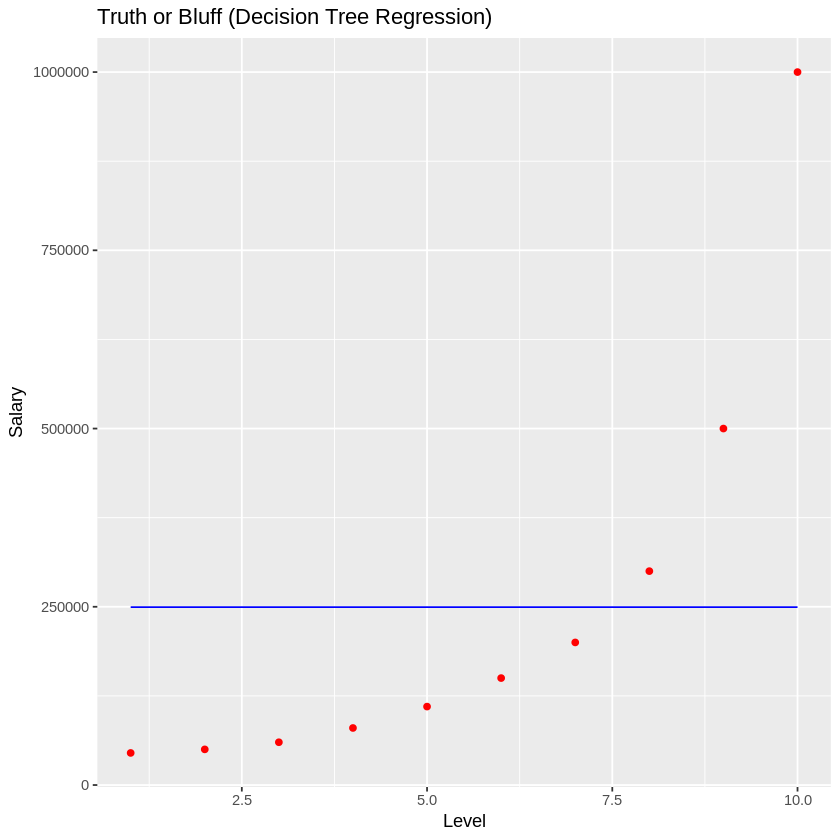

In [12]:
library(ggplot2)

# Create a grid of values for Level
x_grid = seq(min(data$Level), max(data$Level), 0.01)

# Plot the decision tree regression results
ggplot() +
  geom_point(aes(x = data$Level, y = data$Salary), colour = 'red') +
  geom_line(aes(x = x_grid,
                y = predict(model, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')


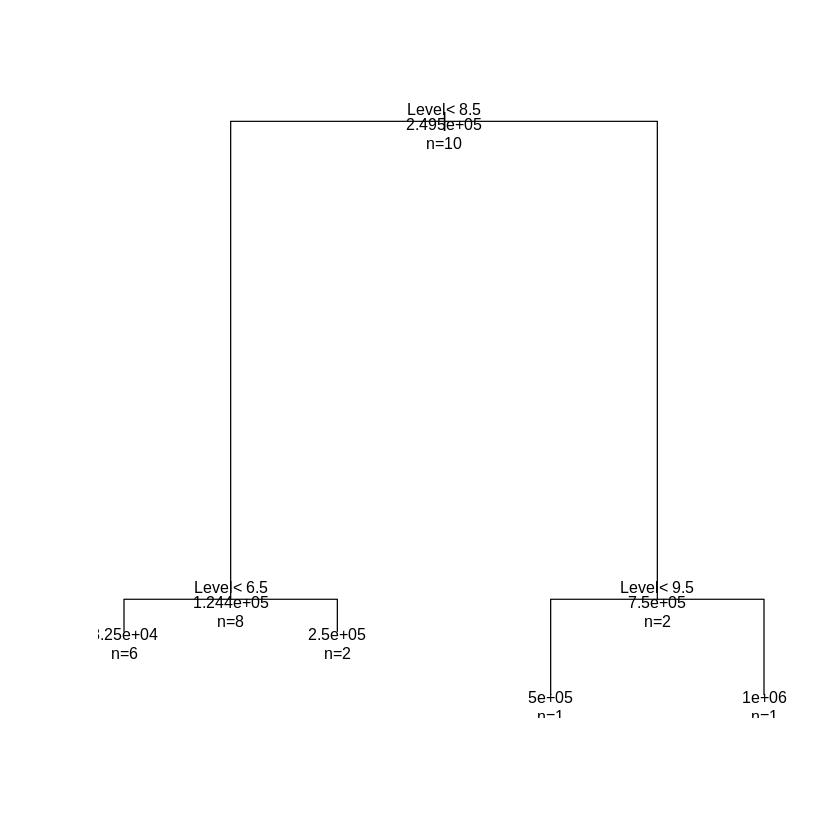

In [16]:
# Load the rpart package if not already loaded
library(rpart)

# Fit the Decision Tree Regression model with control parameters
model <- rpart(Salary ~ Level, data = data, control = rpart.control(minsplit = 1))

# Plot the decision tree
plot(model)

# Add text to the tree plot for better understanding
text(model, use.n = TRUE, all = TRUE, cex = 0.8)



**Classification Tree**

In [26]:
# Import the dataset
data <- read_csv("Social_Network_Ads.csv")

# Display the first few rows of the dataset
print(head(data))


Rows: 400 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Gender
dbl (4): User ID, Age, EstimatedSalary, Purchased

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 5
  `User ID` Gender   Age EstimatedSalary Purchased
      <dbl> <chr>  <dbl>           <dbl>     <dbl>
1  15624510 Male      19           19000         0
2  15810944 Male      35           20000         0
3  15668575 Female    26           43000         0
4  15603246 Female    27           57000         0
5  15804002 Male      19           76000         0
6  15728773 Male      27           58000         0


In [27]:
# Remove the columns "Position" and "Level" from the data frame
data <- data[, !names(data) %in% c("Gender", "User ID")]

# Display the cleaned data frame
print(head(data))


# A tibble: 6 × 3
    Age EstimatedSalary Purchased
  <dbl>           <dbl>     <dbl>
1    19           19000         0
2    35           20000         0
3    26           43000         0
4    27           57000         0
5    19           76000         0
6    27           58000         0


In [25]:
# Display the first few rows of the dataset
print(head(data))

# A tibble: 6 × 4
  `User ID`   Age EstimatedSalary Purchased
      <dbl> <dbl>           <dbl>     <dbl>
1  15624510    19           19000         0
2  15810944    35           20000         0
3  15668575    26           43000         0
4  15603246    27           57000         0
5  15804002    19           76000         0
6  15728773    27           58000         0


In [28]:
# Convert the 'Purchased' column to a factor
data$Purchased <- factor(data$Purchased)

# Display the structure of the dataset to verify the change
str(data)


tibble [400 × 3] (S3: tbl_df/tbl/data.frame)
 $ Age            : num [1:400] 19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: num [1:400] 19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


In [29]:
# Install caTools package if not already installed
install.packages("caTools")

# Load the caTools package
library(caTools)

# Set the seed for reproducibility
set.seed(123)

# Split the dataset into training and test sets with a 0.75 ratio
split <- sample.split(data$Purchased, SplitRatio = 0.75)

# Create training and test sets
training_set <- subset(data, split == TRUE)
test_set <- subset(data, split == FALSE)

# Display the dimensions of the training and test sets
cat("Training set dimensions:", dim(training_set), "\n")
cat("Test set dimensions:", dim(test_set), "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




Training set dimensions: 300 3 
Test set dimensions: 100 3 


In [32]:
# Display the first few rows of the dataset
print(head(training_set))

# Display the first few rows of the dataset
print(head(test_set))

# A tibble: 6 × 3
    Age EstimatedSalary Purchased
  <dbl>           <dbl> <fct>    
1    19           19000 0        
2    26           43000 0        
3    27           58000 0        
4    27           84000 0        
5    32          150000 1        
6    35           65000 0        
# A tibble: 6 × 3
    Age EstimatedSalary Purchased
  <dbl>           <dbl> <fct>    
1    35           20000 0        
2    27           57000 0        
3    19           76000 0        
4    25           33000 0        
5    26           52000 0        
6    45           26000 1        


In [35]:
# Install the dplyr package if it is not already installed
install.packages("dplyr")

# Load the dplyr package
library(dplyr)


training_set %>% summarise( across( everything(), ~ sum(is.na(.))))

test_set %>% summarise( across( everything(), ~ sum(is.na(.))))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Age,EstimatedSalary,Purchased
<int>,<int>,<int>
0,0,0


Age,EstimatedSalary,Purchased
<int>,<int>,<int>
0,0,0


In [39]:
# Display the structure of the training and test sets
cat("Training set structure:\n")
str(training_set)

cat("\nTest set structure:\n")
str(test_set)

# Scale the features of the training set (excluding the target variable)
training_set_scaled <- training_set
training_set_scaled[, -which(names(training_set) == "Purchased")] <- scale(training_set[, -which(names(training_set) == "Purchased")])

# Scale the features of the test set without specifying center and scale
test_set_scaled <- test_set
test_set_scaled[, -which(names(test_set) == "Purchased")] <- scale(test_set[, -which(names(test_set) == "Purchased")])

# Check if the scaling applied correctly
cat("Scaled Training Set:\n")
print(head(training_set_scaled))

cat("\nScaled Test Set:\n")
print(head(test_set_scaled))


Training set structure:
tibble [300 × 3] (S3: tbl_df/tbl/data.frame)
 $ Age            : num [1:300] 19 26 27 27 32 35 26 20 32 18 ...
 $ EstimatedSalary: num [1:300] 19000 43000 58000 84000 150000 65000 80000 86000 18000 82000 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...

Test set structure:
tibble [100 × 3] (S3: tbl_df/tbl/data.frame)
 $ Age            : num [1:100] 35 27 19 25 26 45 46 48 47 29 ...
 $ EstimatedSalary: num [1:100] 20000 57000 76000 33000 52000 26000 28000 29000 49000 43000 ...
 $ Purchased      : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 2 2 1 ...
Scaled Training Set:
# A tibble: 6 × 3
     Age EstimatedSalary Purchased
   <dbl>           <dbl> <fct>    
1 -1.77           -1.47  0        
2 -1.10           -0.788 0        
3 -1.00           -0.360 0        
4 -1.00            0.382 0        
5 -0.523           2.27  1        
6 -0.236          -0.160 0        

Scaled Test Set:
# A tibble: 6 × 3
     Age EstimatedSalary Purchased
   <db

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Predictions on the test set:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   0   0   0   1   1   0   0   1   0   1   0   0   0   0   0   0   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   0   0   1   0   1   0   0   1   1   0   1   1   0   0   0   0   0   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  0   0   0   0   1   0   0   0   0   0   0   0   1   1   1   0   1   0   0   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   0   1   1   0   0   1   1   1   1   1   1   1   0   0   0   1   0   0   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   1   0   1   0   1   1   0   0   1   1   0   1   0   1   1   1   1   0   1 
Levels: 0 1

Comparison of actual and predicted values:
  Actual Predicted
1      0         0
2      0         0
3      0         0
4      0         0
5      0  

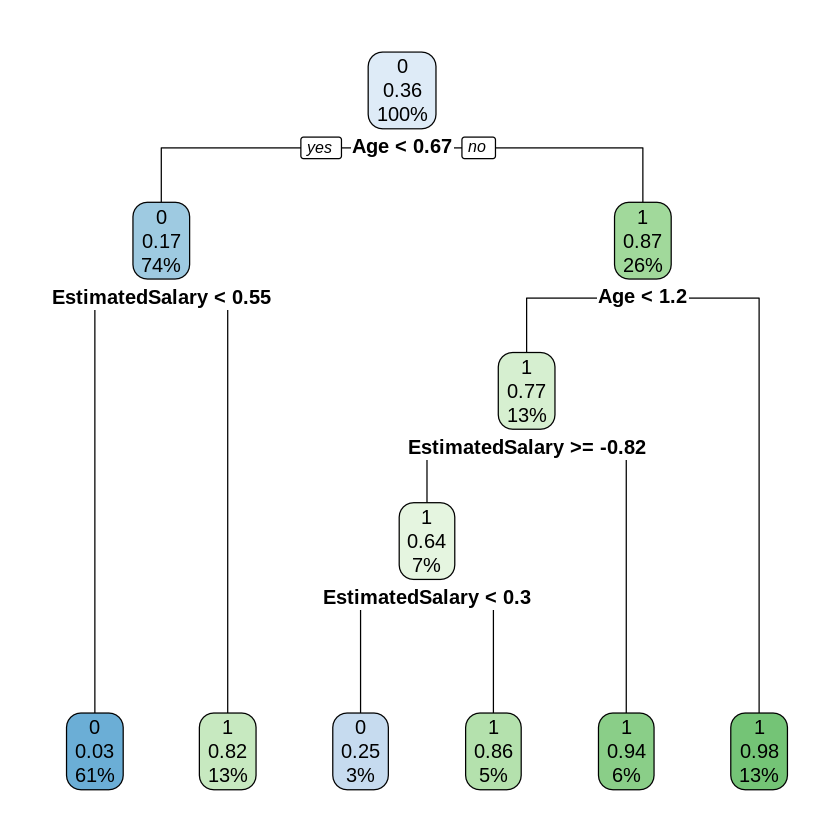

In [40]:
# Install and load required packages
install.packages("rpart")
install.packages("rpart.plot")

library(rpart)
library(rpart.plot)

# Fit the decision tree classifier on the training set
decision_tree_model <- rpart(Purchased ~ ., data = training_set_scaled, method = "class")

# Plot the decision tree
rpart.plot(decision_tree_model)

# Predict on the test set
predictions <- predict(decision_tree_model, newdata = test_set_scaled, type = "class")

# Display the predictions
cat("Predictions on the test set:\n")
print(predictions)

Compare the predictions with actual values
comparison <- data.frame(Actual = test_set_scaled$Purchased, Predicted = predictions)
cat("\nComparison of actual and predicted values:\n")
print(head(comparison))


In [42]:
# Create the confusion matrix
confusion_matrix <- table(Actual = test_set_scaled$Purchased, Predicted = predictions)

# Display the confusion matrix
cat("Confusion Matrix:\n")
print(confusion_matrix)


Confusion Matrix:
      Predicted
Actual  0  1
     0 53 11
     1  6 30


### Explanation of the Structure of a Confusion Matrix:

A confusion matrix is a tabular representation of the actual versus predicted classifications, typically structured as follows:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| **Actual Positive**   | True Positive (TP)    | False Negative (FN)     |
| **Actual Negative**   | False Positive (FP)   | True Negative (TN)      |

- **True Positive (TP)**: The number of instances correctly predicted as positive.
- **True Negative (TN)**: The number of instances correctly predicted as negative.
- **False Positive (FP)**: The number of instances incorrectly predicted as positive (Type I error).
- **False Negative (FN)**: The number of instances incorrectly predicted as negative (Type II error).

### (a) How to Read a Confusion Matrix:

To read a confusion matrix:

1. **Rows represent Actual Values**: The rows indicate the true classes of the observations.
2. **Columns represent Predicted Values**: The columns indicate the predicted classes by the model.
3. **Diagonal Values**: The diagonal values (TP and TN) indicate the correct predictions.
4. **Off-Diagonal Values**: The off-diagonal values (FP and FN) indicate the incorrect predictions.



### (b) What Can You Derive from It:

From a confusion matrix, you can derive several important metrics:

1. **Accuracy**: The overall correctness of the model.
   [
   Accuracy = {TP + TN}/{TP + TN + FP + FN}
   ]

2. **Precision**: The ratio of true positives to the total predicted positives.
   [
  Precision = {TP}/{TP + FP}
   ]

3. **Recall (Sensitivity)**: The ratio of true positives to the total actual positives.
   [
   Recall = {TP}/{TP + FN}
   ]

4. **F1 Score**: The harmonic mean of precision and recall.
   [ F1 Score = 2 . {Precision} . {Recall}}/{Precision} +{Recall}}
   ]

5. **Specificity**: The ratio of true negatives to the total actual negatives.
   [
   Specificity = {TN}/{TN + FP}
   ]

6. **Error Rate**: The proportion of all incorrect predictions.
   [
  Error Rate = {FP + FN}/{TP + TN + FP + FN}
   ]



In [47]:
# Install and Load the necessary library
install.packages("ElemStatLearn")

library(ElemStatLearn)

# Use the training set
set = training_set_scaled  # Make sure to use the scaled training set

# Create a sequence for Age (X1) and Estimated Salary (X2)
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)

# Create a grid of all combinations of Age and Estimated Salary
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

# Predict the class for each point in the grid
y_grid = predict(decision_tree_model, newdata = grid_set, type = 'class')

# Plot the training set results
plot(set[, -3],
     main = 'Decision Tree Classification (Training set)',
     xlab = 'Age',
     ylab = 'Estimated Salary',
     xlim = range(X1),
     ylim = range(X2))

# Add the contour of the decision boundary
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)

# Add the points from the grid to the plot
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))

# Add the actual training set points to the plot
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ElemStatLearn’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error in library(ElemStatLearn): there is no package called ‘ElemStatLearn’


In [46]:
# Load the necessary library
library(ElemStatLearn)

# Use the test set
set = test_set_scaled  # Ensure you are using the scaled test set

# Create a sequence for Age (X1) and Estimated Salary (X2)
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)

# Create a grid of all combinations of Age and Estimated Salary
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

# Predict the class for each point in the grid
y_grid = predict(classifier, newdata = grid_set, type = 'class')

# Plot the test set results
plot(set[, -3],
     main = 'Decision Tree Classification (Test set)',
     xlab = 'Age',
     ylab = 'Estimated Salary',
     xlim = range(X1),
     ylim = range(X2))

# Add the contour of the decision boundary
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)

# Add the points from the grid to the plot
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))

# Add the actual test set points to the plot
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))


ERROR: Error in library(ElemStatLearn): there is no package called ‘ElemStatLearn’
